In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,auc,roc_auc_score
from sklearn.metrics import recall_score, precision_score, accuracy_score, f1_score
# Data Handling: Load CSV

data_df = pd.read_csv("./datasets-project/creditcard.csv")



In [8]:
df =data_df.copy()
# get to know list of features, data shape, stat. description.
print(df.shape)

print("First 5 lines:")
print(df.head(5))

print("describe: ")
print(df.describe())

print("info: ")
print(df.info())

(284807, 31)
First 5 lines:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

    

In [48]:
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [49]:
df.iloc[0].to_frame()

,0
Time,0.00
V1,-1.36
V2,-0.07
V3,2.54
V4,1.38
V5,-0.34
V6,0.46
V7,0.24
V8,0.10
V9,0.36


In [9]:
from sklearn.preprocessing import StandardScaler

df['scaled_Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1,1))

In [10]:
df=df.drop('Amount',axis=1)

In [52]:
from sklearn.model_selection import train_test_split
X = df.drop('Class',axis=1)
y = df['Class'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0,stratify=y)

In [11]:
import seaborn as sns
def com_confusion_matrix(target_values,predicted_values,x_label,y_label):
    cm = pd.crosstab(target_values, predicted_values, rownames=['Actual'], colnames=['Predicted'])
    fig, (ax1) = plt.subplots(ncols=1, figsize=(5,5))
    sns.heatmap(cm,
                xticklabels=[x_label, y_label],
                yticklabels=[x_label, y_label],
                annot=True,ax=ax1,
                linewidths=.2,linecolor="Darkblue", cmap="Blues",fmt='g')
    plt.title('Confusion Matrix', fontsize=14)
    plt.show()

In [12]:
def get_predictions(clf,x_tr,y_tr,x_tst):
    clf=clf
    clf.fit(x_tr,y_tr)
    y_prd = clf.predict(x_tst)
    y_pred_prob = clf.predict_proba(x_tst)
    
    tr_pred = clf.predict(x_tr)
    # print(f'train-set confusion matrix:\n {confusion_matrix(y_tr,tr_pred)}')
    print(f'train-set confusion matrix:\n {com_confusion_matrix(y_tr,tr_pred,'Non Fraud','Fraud')}')
    return y_prd,y_pred_prob

In [13]:
def print_scores(y_test,y_pred,y_pred_prob):
    print('test-set confusion matrix:\n', confusion_matrix(y_test,y_pred))
    print("recall score: ", recall_score(y_test,y_pred))
    print("precision score: ", precision_score(y_test,y_pred))
    print("f1 score: ", f1_score(y_test,y_pred))
    print("accuracy score: ", accuracy_score(y_test,y_pred))
    print("ROC AUC: {}".format(roc_auc_score(y_test, y_pred_prob[:,1])))

In [14]:
def split_data(df, drop_list):
    df = df.drop(drop_list,axis=1)
    print(df.columns)
    #test train split time
    from sklearn.model_selection import train_test_split
    y = df['Class'].values #target
    X = df.drop(['Class'],axis=1).values #features
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                        random_state=42, stratify=y)

    print("train-set size: ", len(y_train),
          "\ntest-set size: ", len(y_test))
    print("fraud cases in test-set: ", sum(y_test))
    return X_train, X_test, y_train, y_test

In [15]:
from sklearn.naive_bayes import  GaussianNB
from sklearn.linear_model import LogisticRegression

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Class',
       'scaled_Amount'],
      dtype='object')
train-set size:  227845 
test-set size:  56962
fraud cases in test-set:  98


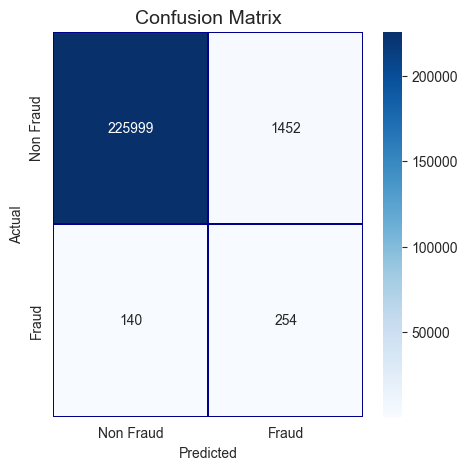

train-set confusion matrix:
 None
test-set confusion matrix:
 [[56473   391]
 [   33    65]]
recall score:  0.6632653061224489
precision score:  0.1425438596491228
f1 score:  0.23465703971119134
accuracy score:  0.992556441136196
ROC AUC: 0.9679048937385871


In [58]:
# Case-NB-1 : do not drop anything
drop_list = []
X_train, X_test, y_train, y_test = split_data(df, drop_list)
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)



Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11',
       'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class',
       'scaled_Amount'],
      dtype='object')
train-set size:  227845 
test-set size:  56962
fraud cases in test-set:  98


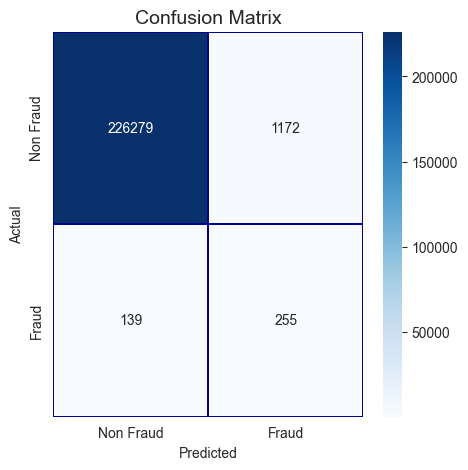

train-set confusion matrix:
 None
test-set confusion matrix:
 [[56541   323]
 [   31    67]]
recall score:  0.6836734693877551
precision score:  0.1717948717948718
f1 score:  0.27459016393442626
accuracy score:  0.9937853305712581
ROC AUC: 0.9683951432993007


In [59]:
drop_list = ['V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8']
X_train, X_test, y_train, y_test = split_data(df, drop_list)
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class', 'scaled_Amount'],
      dtype='object')
train-set size:  227845 
test-set size:  56962
fraud cases in test-set:  98


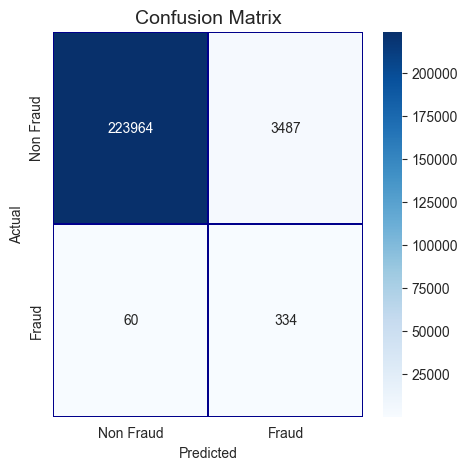

train-set confusion matrix:
 None
test-set confusion matrix:
 [[55936   928]
 [   12    86]]
recall score:  0.8775510204081632
precision score:  0.08481262327416174
f1 score:  0.15467625899280577
accuracy score:  0.9834977704434535
ROC AUC: 0.9613612643988377


In [60]:
# Case-NB-3 : drop some of principle components + Time 
drop_list = ['Time','V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8']
X_train, X_test, y_train, y_test = split_data(df, drop_list)
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12',
       'V14', 'V16', 'V17', 'V18', 'V19', 'V21', 'Class', 'scaled_Amount'],
      dtype='object')
train-set size:  227845 
test-set size:  56962
fraud cases in test-set:  98


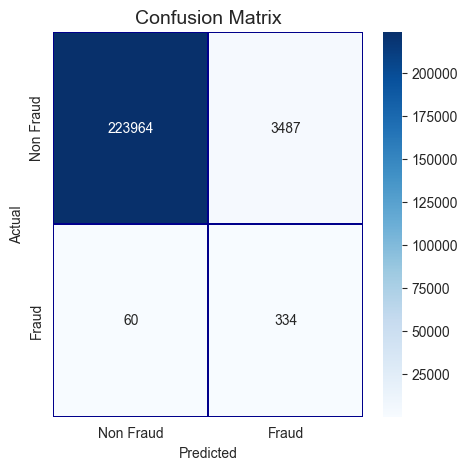

train-set confusion matrix:
 None
test-set confusion matrix:
 [[55936   928]
 [   12    86]]
recall score:  0.8775510204081632
precision score:  0.08481262327416174
f1 score:  0.15467625899280577
accuracy score:  0.9834977704434535
ROC AUC: 0.9613612643988377


In [61]:
from sklearn.naive_bayes import  GaussianNB
# Case-NB-4 : drop some of principle components + Time + 'scaled_Amount'
drop_list = ['Time','V28','V27','V26','V25','V24','V23','V22','V20','V15','V13','V8']
X_train, X_test, y_train, y_test = split_data(df, drop_list)
y_pred, y_pred_prob = get_predictions(GaussianNB(), X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)

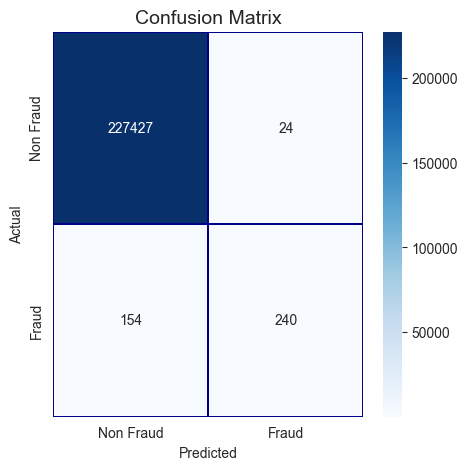

train-set confusion matrix:
 None
test-set confusion matrix:
 [[56851    13]
 [   39    59]]
recall score:  0.6020408163265306
precision score:  0.8194444444444444
f1 score:  0.6941176470588235
accuracy score:  0.9990871107053826
ROC AUC: 0.9740648651131809


In [62]:
y_pred, y_pred_prob = get_predictions(LogisticRegression(C = 0.01, penalty = 'l2')
                                      , X_train, y_train, X_test)
print_scores(y_test,y_pred,y_pred_prob)